In [2]:
!wget https://storage.googleapis.com/releases.naturalcapitalproject.org/invest/3.12.1/data/SDR.zip && unzip SDR.zip

--2023-03-01 20:14:51--  https://storage.googleapis.com/releases.naturalcapitalproject.org/invest/3.12.1/data/SDR.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.40.48, 142.250.72.240, 142.250.176.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.40.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 726317 (709K) [application/zip]
Saving to: `SDR.zip'

100%[======================================>] 726,317     --.-K/s   in 0.04s   

2023-03-01 20:14:52 (18.9 MB/s) - `SDR.zip' saved [726317/726317]

Archive:  SDR.zip
   creating: SDR/
  inflating: SDR/subwatersheds_gura.shx  
  inflating: SDR/erodibility_gura.tif.aux.xml  
  inflating: SDR/subwatersheds_gura.prj  
  inflating: SDR/subwatersheds_gura.shp  
  inflating: SDR/erosivity_gura.tif.aux.xml  
  inflating: SDR/watershed_gura.dbf  
  inflating: SDR/land_use_gura.tif   
  inflating: SDR/land_use_gura.lyr   
  inflating: SDR/land_use_gura.tif.vat.dbf  
  i

In [1]:
import logging
import sys
import os
import pprint

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

from natcap.invest.sdr import sdr
from natcap.invest import datastack

sdr_args = datastack.extract_parameter_set('SDR/sdr_gura.invs.json').args
pprint.pprint(sdr_args)

{'biophysical_table_path': '/home/mygeohub/jdouglass/SDR/biophysical_table_Gura.csv',
 'dem_path': '/home/mygeohub/jdouglass/SDR/DEM_gura.tif',
 'drainage_path': '',
 'erodibility_path': '/home/mygeohub/jdouglass/SDR/erodibility_gura.tif',
 'erosivity_path': '/home/mygeohub/jdouglass/SDR/erosivity_gura.tif',
 'ic_0_param': '0.5',
 'k_param': '2',
 'l_max': '122',
 'lulc_path': '/home/mygeohub/jdouglass/SDR/land_use_gura.tif',
 'results_suffix': 'gura',
 'sdr_max': '0.8',
 'threshold_flow_accumulation': '1000',
 'watersheds_path': '/home/mygeohub/jdouglass/SDR/watershed_gura.shp'}


In [2]:
sdr_args['workspace_dir'] = os.path.join(os.getcwd(), 'sdr_workspace_gura')
sdr.execute(sdr_args)

INFO:pygeoprocessing.geoprocessing:starting stats_worker
INFO:pygeoprocessing.geoprocessing:started stats_worker <Thread(Thread-5 (stats_worker), started daemon 139855981725440)>
INFO:pygeoprocessing.geoprocessing:100.0% complete
INFO:pygeoprocessing.geoprocessing:Waiting for raster stats worker result.
INFO:pygeoprocessing.geoprocessing:1 of 4 aligned: aligned_dem_gura.tif
INFO:pygeoprocessing.geoprocessing:starting stats_worker
INFO:pygeoprocessing.geoprocessing:started stats_worker <Thread(Thread-6 (stats_worker), started daemon 139855981725440)>
INFO:pygeoprocessing.geoprocessing:100.0% complete
INFO:pygeoprocessing.geoprocessing:Waiting for raster stats worker result.
INFO:pygeoprocessing.geoprocessing:2 of 4 aligned: aligned_lulc_gura.tif
INFO:pygeoprocessing.geoprocessing:starting stats_worker
INFO:pygeoprocessing.geoprocessing:started stats_worker <Thread(Thread-7 (stats_worker), started daemon 139855981725440)>
INFO:pygeoprocessing.geoprocessing:100.0% complete
INFO:pygeoproce

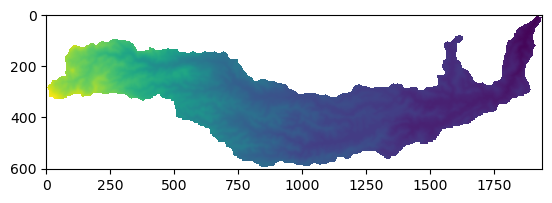

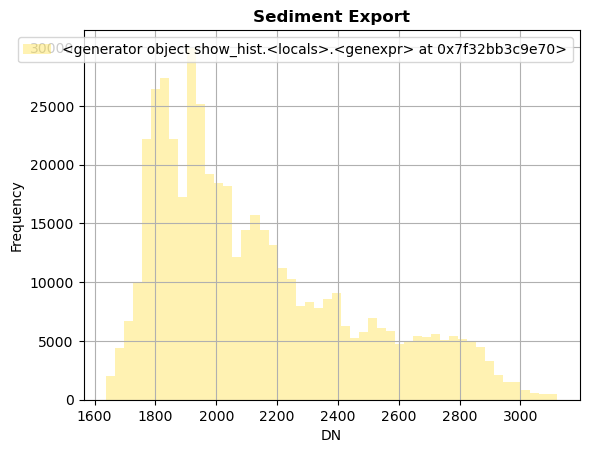

In [10]:
import rasterio.plot
import numpy
import pygeoprocessing
raster_path = 'sdr_workspace_gura/intermediate_outputs/pit_filled_dem_gura.tif'
info = pygeoprocessing.get_raster_info(raster_path)
array = pygeoprocessing.raster_to_numpy_array(raster_path).astype(numpy.float32)
array[numpy.isclose(array, info['nodata'][0])] = numpy.nan

rasterio.plot.show(array, cmap='viridis')
rasterio.plot.show_hist(
    array, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Sediment Export")